## Dependency load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)

#plt.style.available -- to see the available style option for matlib
plt.style.use('seaborn-v0_8-dark-palette') # choice of style option

In [2]:
#findstr instead of grep because of missing UNIX env
#datasource: https://www.kaggle.com/datasets/tonygordonjr/spotify-dataset-2023
%ls .\data\raw\ | findstr csv 

20.12.2023  23:38         2.505.512 spotify_artist_data_2023.csv
20.12.2023  23:38       212.805.413 spotify_data_12_20_2023.csv
20.12.2023  23:38       117.294.178 spotify_features_data_2023.csv
20.12.2023  23:38        13.686.762 spotify_tracks_data_2023.csv
20.12.2023  23:38        99.198.382 spotify-albums_data_2023.csv


## Data Load and Exploration

In [3]:
#decision for overview data instead of subsets based on analysis approach ("overview insights")  
df = pd.read_csv("./data/raw/spotify_data_12_20_2023.csv")
df.info()
df.head(5)

<ipython-input-3-db57b9a0aa55>:2: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/raw/spotify_data_12_20_2023.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375140 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375089 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,artist_id,duration_sec,label,release_date,total_tracks,track_id,track_name,track_number,artist_genres,artist_popularity,followers,name,genre_0,genre_1,genre_2,genre_3,genre_4,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,92.063,About Benjamin Records,2023-04-15 00:00:00 UTC,8,5JucnTkqh8uCZGggL1xxvv,Intro,1,[],0,133,AB,NaN,NaN,NaN,NaN,NaN,0.03050,https://api.spotify.com/v1/audio-analysis/5Juc...,0.622,92064.0,0.554,0.000001,5.0,0.3920,-9.505,0.0,0.414,72.546,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,125.320,About Benjamin Records,2023-04-15 00:00:00 UTC,8,4VWrKNG3ssyZeboTgQ7Kj1,Play It Cool,5,[],0,133,AB,NaN,NaN,NaN,NaN,NaN,0.01120,https://api.spotify.com/v1/audio-analysis/4VWr...,0.899,125320.0,0.701,0.000000,11.0,0.1530,-6.182,0.0,0.138,101.581,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,139.800,About Benjamin Records,2023-04-15 00:00:00 UTC,8,6JsVrTLJPSOSpgJSnZyfSK,3 Peat,3,[],0,133,AB,NaN,NaN,NaN,NaN,NaN,0.08150,https://api.spotify.com/v1/audio-analysis/6JsV...,0.782,139800.0,0.716,0.000000,10.0,0.1260,-8.295,0.0,0.382,99.789,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,147.777,About Benjamin Records,2023-04-15 00:00:00 UTC,8,7pZpw1xJWIavCUGqXPPriP,Affiliated,6,[],0,133,AB,NaN,NaN,NaN,NaN,NaN,0.00413,https://api.spotify.com/v1/audio-analysis/7pZp...,0.944,147778.0,0.582,0.000000,1.0,0.0961,-9.205,1.0,0.297,105.010,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,102.600,About Benjamin Records,2023-04-15 00:00:00 UTC,8,0ylqwc3gcJdJotKd4SfMiu,Springfield,8,[],0,133,AB,NaN,NaN,NaN,NaN,NaN,0.01290,https://api.spotify.com/v1/audio-analysis/0ylq...,0.527,102600.0,0.641,0.000000,5.0,0.0869,-11.173,0.0,0.730,172.723,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


## Understanding the correlation between track popularity and characteristics

In [4]:
#reducing the columns to lean down the dataframe
column_subset = [
             "track_id",
             "track_popularity",
             "track_name",
             "acousticness",
             "danceability",
             "duration_ms",
             "energy",
             "instrumentalness",
             "loudness",
             "mode",
             "speechiness",
             "tempo",
             "release_year",             
]
df_lean = df[column_subset]

#adding popularity score clustering via loop (tbd if this approach is slower than .loc approach used in other projects)
df_lean['score_cluster'] = ''

for i, row in df_lean.iterrows():
    score = 'no score'
    if (row.track_popularity == 0):
        score = 'unpopular (0)'    
    if (row.track_popularity > 0) & (row.track_popularity <= 25):
        score = 'low (<= 25)'
    elif (row.track_popularity > 25) & (row.track_popularity <= 50):
        score = 'medium (25-50)'            
    elif row.track_popularity > 75:
        score = 'high (>75)'
    df_lean.at[i, 'score_cluster'] = score

<ipython-input-4-f02d79f7f7a5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lean['score_cluster'] = ''


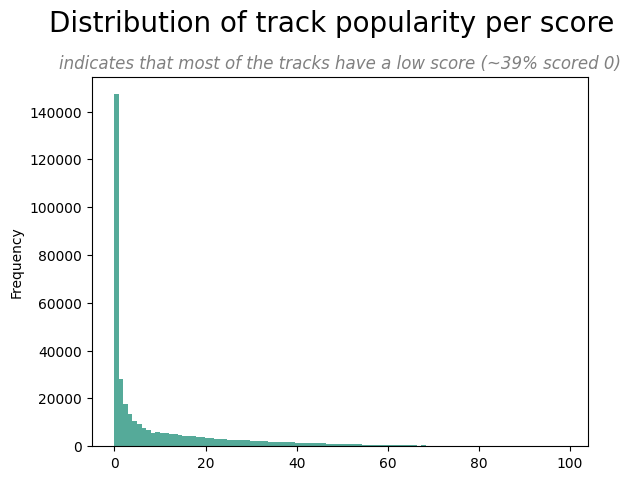

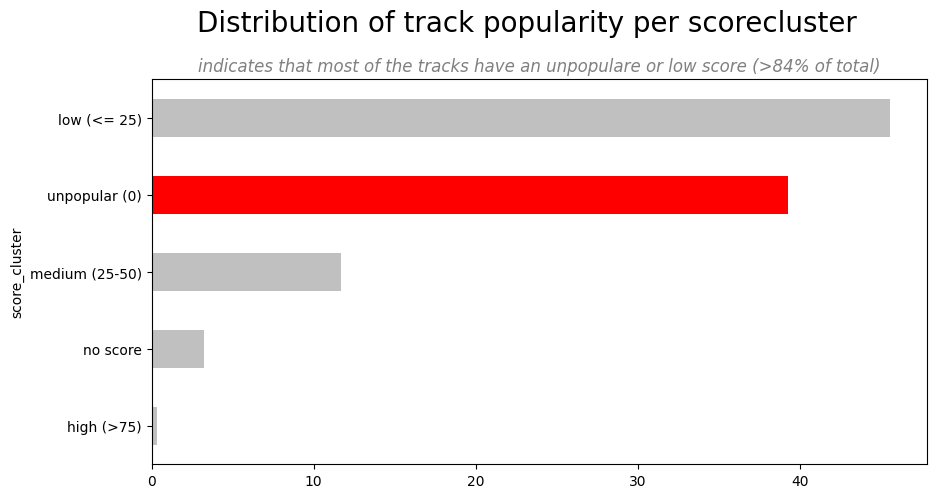

score_cluster
high (>75)         0.328143
no score           3.206794
medium (25-50)    11.671878
unpopular (0)     39.248976
low (<= 25)       45.544209
Name: proportion, dtype: float64

In [21]:
#distribution of track popularity
color = sns.color_palette("dark:#5A9_r")

df_lean["track_popularity"].plot(kind="hist", bins=100, color=color)

# Add suptitle above the title
plt.suptitle("Distribution of track popularity per score\n", fontsize=20, y=1.02)

# Add title
plt.title("indicates that most of the tracks have a low score (~39% scored 0)", color="grey", style='italic')

plt.show()
df_lean["track_popularity"].value_counts(normalize=True,ascending=True)*100


df_lean_cluster = df_lean["score_cluster"].value_counts(normalize=True,ascending=True)*100

#colors = list(map(lambda x: 'silver' if x < 40 else 'purple',df_lean_marker))

colors = ('silver','silver','silver','red','silver')

df_lean_cluster.plot(
    kind="barh", figsize=(10, 5), color=colors
)
# Add suptitle above the title
plt.suptitle("Distribution of track popularity per scorecluster\n", fontsize=20, y=1.02)

# Add title
plt.title("indicates that most of the tracks have an unpopulare or low score (>84% of total)", color="grey", style='italic')
plt.show()